# Research Project
COMP 435 Introduction to Machine Learning, Spring 2025

- Instructor: Jon Hutchins
- Author: Ina Tang
- Dataset: Sentiment140 on [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140/data)
- Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

> Just 75% accuracy would be good... – Dr. Hutchins

### Schema
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY. 
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

### Ideas

- [ ] Proportions of + and -
- [ ] Total frequency of word
    - [ ] remove pronouns, prepositions, conjunctions, article adjectives, etc. ?
    - [ ] cutoff for words with (say) less than 1% frequency 
- [ ] Correlation between word and each label (porportions)
- [ ] Affect of capitalization and punctuations on prediction
- [ ] Use deep neural network(s) to identify strong FPs and FNs (weird data points)
- [ ] (Synthesized feature) Certain collection(s) of words that strongly correlates with one of the labels


### Previous labs
- [Linear Regression with a Real Dataset](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb)
- [Linear Regression with Synthetic Data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)
- [Logistic Regression](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/core/logistic_regression_core.ipynb)

In [2]:
# pip install numpy pandas torch matplotlib seaborn

In [3]:
import numpy as np
import pandas as pd
# import torch
import matplotlib.pyplot as plt
import seaborn as sns  # sns.pairplot

from typing import Dict, List

In [ ]:
# generated by GitHub Copilot with minor edits

# Load & setup
# runtime: 5s
df = pd.read_csv('data.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']  # target: 0 = negative, 4 = positive
df['target'] = df['target'].replace({4: 1})  # Replace 4s (positives) with 1s in the 'target' column
print(df.head())

NUMBER_OF_TARGET_VALUES = 2

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [28]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

In [41]:
print(f"Total number of examples: {df['target'].value_counts().sum()}")

Total number of examples: 1600000


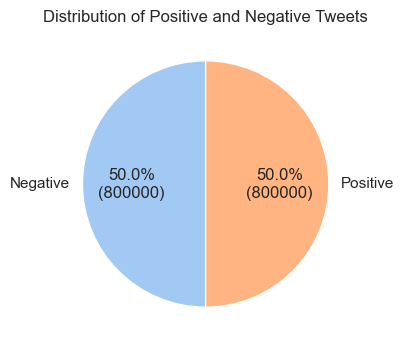

In [45]:
# Plot ratio of positive and negative tweets
# runtime: 0s



def func(pct, allvals):
    absolute = int(np.round(pct / 100. * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

# Data for the pie chart
data = df['target'].value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    data, 
    labels=['Negative', 'Positive'],  # Adjust labels as needed
    autopct=lambda pct: func(pct, data), 
    startangle=90, 
    colors=sns.color_palette("pastel")[:len(data)]  # Use seaborn color palette
)
plt.title('Distribution of Positive and Negative Tweets')
plt.show()

## Word Count

In [ ]:
# generated by GitHub Copilot with minor edits
# runtime: 45s

print("Counting words...")
word_counts: Dict[str, Dict[int, int]] = {}  # word -> target -> frequency

for i, row in df.iterrows():
    words: List[str] = list(set(row['text'].split()))
    target: int = row['target']
    for word in words:
        if word in word_counts:
            word_counts[word][target] += 1
        else:
            word_counts[word] = {0: 0, 1: 0}  # initialize
            word_counts[word][target] = 1

print("Sorting words by total frequency...")  # runtime: 1s
word_counts = {k: v for k, v in sorted(word_counts.items(), key=lambda item: sum(item[1].values()), reverse=True)}  # sort by counts

Counting words...
Sorting words by total frequency...


In [7]:
# print(word_counts)

In [21]:
# generated by GitHub Copilot with minor edits
# runtime: 15s
word_counts_df = pd.DataFrame(word_counts).T.reset_index()
word_counts_df.columns = ['word', 'neg', 'pos']
# pos: number of positive examples which contains the word
word_counts_df['total'] = word_counts_df['neg'] + word_counts_df['pos']
word_counts_df.head()

,word,neg,pos,total
0,to,243891,205548,449439
1,the,198554,204706,403260
2,I,225262,157744,383006
3,a,154666,166868,321534
4,my,148772,103172,251944


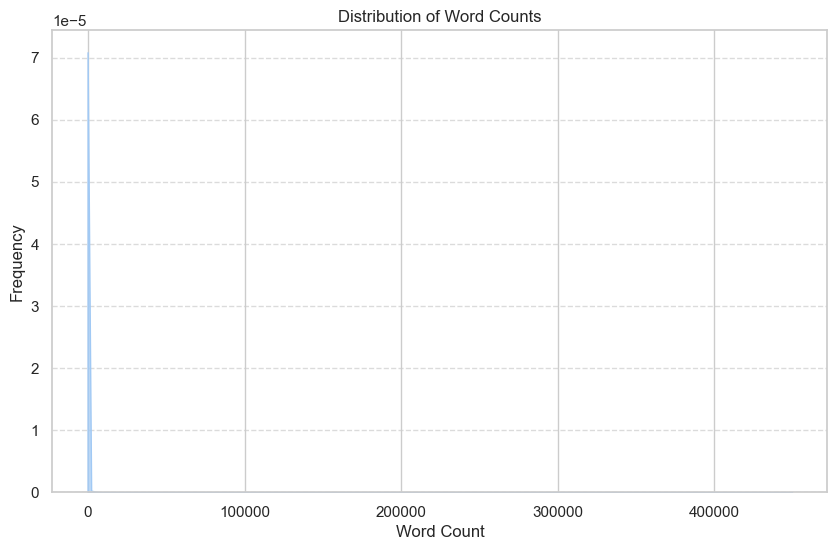

In [ ]:
# generated by GitHub Copilot with minor edits

# Plot the distribution of the words
plt.figure(figsize=(10, 6))
# sns.kdeplot(word_counts_df['total'], fill=True, color=sns.color_palette("pastel")[0], alpha=0.7)
# plt.hist(word_counts_df['total'].values, bins=50, density=True, color=sns.color_palette("pastel")[0])
# TODO: Fix the following line
plt.stairs(word_counts_df['total'].grou, bins=50, color=sns.color_palette("pastel")[0])
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()